# Map loss of total industry to loss per sector

In [1]:
%load_ext autoreload
%autoreload 2

import sys
sys.path.append("../src")
import pandas as pd
from sectors import calculate_sector_losses, load_industry_loss
from inputshock import calculate_agriculture_loss, calculate_agriculture_loss_for_all_countries, plot_yield_loss_world_map, add_iso3_to_yield_loss_results

We first define a scenario with a % of total industry loss per country. These numbers can be derived from the `master.ipynb` and `HEMP.ipynb` notebooks.

In [13]:
# These contain the fraction of industry destroyed by fire and the fraction of industry within HEMP radius
# Add or remove files as needed
file_paths = [
    "../results/Toon2008_SORT_revised_burn_radius.csv",
    "../results/HEMP_china.csv",
    "../results/HEMP_conus.csv",
    "../results/HEMP_europe.csv",
    "../results/HEMP_russia.csv",
]

df = load_industry_loss(file_paths, hemp_disable_factor=0.75)
df

,iso3,industry_destroyed_pct,industry_hempd_pct,industry_loss_pct
0,ALB,0.0,100.0,75.0000
1,AUT,0.0,100.0,75.0000
2,BEL,0.0,100.0,75.0000
3,BGR,0.0,82.0,61.5000
4,BHS,0.0,62.0,46.5000
5,BIH,0.0,100.0,75.0000
6,BLR,0.0,84.0,63.0000
7,CAN,0.0,88.0,66.0000
8,CHE,0.0,100.0,75.0000
9,CHN,13.5,84.0,67.9950


We now map these numbers to the sectoral loss using data for the per-country production of each sector. 

In [14]:
total_industry_loss = df.set_index("iso3")["industry_loss_pct"].to_dict()
sector_losses = calculate_sector_losses(total_industry_loss)

Country LVA not found in fertilizer production data
Country XKX not found in fertilizer production data
Country XKX not found in pesticide production data

Losses per sector for the whole world:
----------------------------------------
Sector               Loss (%)  
----------------------------------------
N fertilizer         44.2      
P fertilizer         47.0      
K fertilizer         60.1      
Pesticide            39.7      
----------------------------------------


We can the transform this into a loss of agriculture production by country (single country or for the whole world, the latter taking quite a bit of time)

In [13]:
_ = calculate_agriculture_loss(
    country="New Zealand",
    N_loss=sector_losses["N_fertilizer_loss_percent"],
    P_loss=sector_losses["P_fertilizer_loss_percent"],
    K_loss=sector_losses["K_fertilizer_loss_percent"],
    pesticide_loss=sector_losses["pesticide_loss_percent"],
)

New Zealand loses 28.1% of its agriculture production


In [15]:
calculate_agriculture_loss_for_all_countries(
    N_loss=sector_losses["N_fertilizer_loss_percent"],
    P_loss=sector_losses["P_fertilizer_loss_percent"],
    K_loss=sector_losses["K_fertilizer_loss_percent"],
    pesticide_loss=sector_losses["pesticide_loss_percent"],
)
add_iso3_to_yield_loss_results()

Central African Republic loses 0.9% of its agriculture production
South Africa loses 15.7% of its agriculture production
Results saved to ../results/yield_loss_results.csv


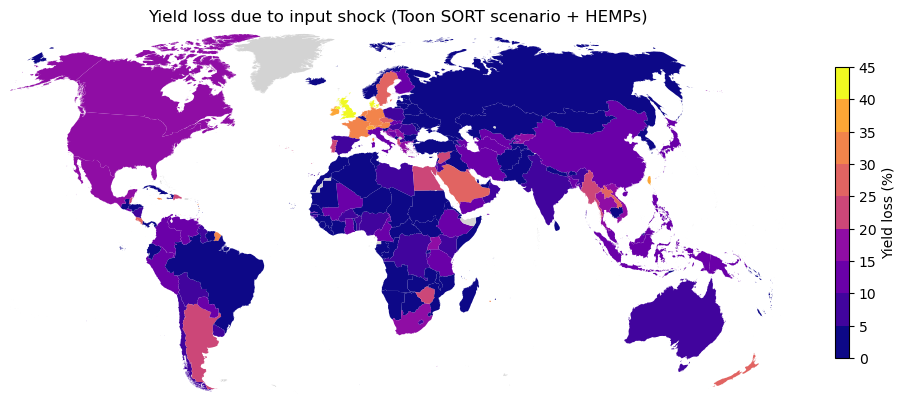

In [20]:
plot_yield_loss_world_map(scenario_name="Toon SORT scenario + HEMPs")